# Вариант 3

### План

1. **Сначала сделаем небольшой препроцессинг:**
    - Посмотрим на данные
2. **Далее сформулируем гипотезы, исходя из общей задачи:**
    - Сформулируем предположения, которые будем тестировать
    - Построим графики
3. **Тестируем гипотезы:**
     - Выбираем гипотезу
     - Выбираем подходящий тест
     - Тестируем
4. **Подводим итоги:**
    - Сформулировать выводы и суммаризировать всё что было
    - Какие действия нужно предпринять разработчикам/бизнесу, чтобы стало лучше? Как можно будет позже провести A/B тестирование?


In [634]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
from scipy.stats import bootstrap, norm, chi2_contingency, chi2, kruskal, mannwhitneyu, friedmanchisquare, shapiro, f, levene, poisson
from tqdm import tqdm
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
%matplotlib inline

## 1: графики, гипотезы и тесты для данных users

In [637]:
users_test = pd.read_csv('Проект_3_users_test.csv', encoding='Windows-1251', sep=';')
users_control_1 = pd.read_csv('Проект_3_users_control_1.csv', encoding='Windows-1251', sep=';')
users_control_2 = pd.read_csv('Проект_3_users_control_2.csv', encoding='Windows-1251', sep=';')

In [639]:
users_test.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,1.0,NaN,0


In [641]:
users_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4308 non-null   int64  
 1   age               4308 non-null   int64  
 2   attraction_coeff  4308 non-null   int64  
 3   coins             49 non-null     float64
 4   country           4308 non-null   object 
 5   visit_days        2978 non-null   object 
 6   gender            4308 non-null   int64  
 7   age_filter_start  4308 non-null   int64  
 8   age_filter_end    4308 non-null   int64  
 9   views_count       4308 non-null   int64  
 10  was_premium       408 non-null    float64
 11  is_premium        157 non-null    float64
 12  total_revenue     4308 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 437.7+ KB


In [643]:
users_test.nunique()

uid                 4308
age                   57
attraction_coeff     600
coins                 28
country               51
visit_days           891
gender                 2
age_filter_start      51
age_filter_end        78
views_count          331
was_premium            1
is_premium             1
total_revenue        105
dtype: int64

In [645]:
users_test.shape

(4308, 13)

In [647]:
users_test.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4259
country                0
visit_days          1330
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3900
is_premium          4151
total_revenue          0
dtype: int64

In [649]:
users_test.describe()

,uid,age,attraction_coeff,coins,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
count,4.308000e+03,4308.000000,4308.000000,49.000000,4308.000000,4308.000000,4308.000000,4308.000000,408.0,157.0,4308.000000
mean,8.917437e+08,31.889276,316.411328,229.836735,0.953110,26.701486,38.248839,50.391133,1.0,1.0,534.080316
std,4.547670e+05,10.245287,323.373725,1205.819471,0.211427,9.390851,15.344562,318.676437,0.0,0.0,4371.682632
min,8.910511e+08,16.000000,0.000000,1.000000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913621e+08,25.000000,0.000000,4.000000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917290e+08,30.000000,250.000000,9.000000,1.000000,24.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920952e+08,38.000000,520.250000,72.000000,1.000000,32.000000,44.000000,22.000000,1.0,1.0,0.000000
max,9.051586e+08,99.000000,1000.000000,8466.000000,1.000000,96.000000,102.000000,12831.000000,1.0,1.0,129870.000000


Пропущенные значения coins NaN - число монеток (внутренняя валюта) - заполним на 0 для дальнейших расчетов. 0 будет означать, что пользователь не имеет (не пользовался) внутренней валютой.
Для оценки наличия премиума буду использовать данные was_premium – был ли когда-либо премиум (либо пробный период премиум-статуса, либо купленный за деньги). В этих данных тоже есть пропуски, заполню их нулями. Если премиум был - будет 1, если нет - 0.
Практически треть наблюдений visit_days тоже имеет пропущенные значения. Удалять эти значения считаю не целесообразным.
Посчитаю количество дней, в которые после регистрации пользователь посещал приложение, путем сплитования данных в колонке visit_days, сохраню эти данные в новую переменную duration_of_stay и пропущенные значения заполню средним значением по этому столбцу.
is_premium - является ли премиум в настоящий момент - удалю. В принципе вся информация по наличию премиум попадет в was_premium.
Аналогичные действия произведу с таблицами usrers для групп control_1, control_2

In [652]:
users_test['coins'] = users_test['coins'].fillna(0)

In [654]:
users_test.query('was_premium == 1')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
4,891406035,27,1000,0.0,France,NaN,1,24,30,1,1.0,NaN,0
13,891219699,30,1000,0.0,United States of America,NaN,1,27,33,1,1.0,NaN,0
20,891152790,29,769,0.0,Spain,"2,5,6",1,16,32,13,1.0,1.0,12597
36,891348462,24,466,0.0,United States of America,NaN,1,16,36,15,1.0,NaN,0
44,891589239,21,303,37.0,Italy,"1,2,3,4,5,6,7,8,9",1,18,24,181,1.0,1.0,37817
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199,891199206,21,333,0.0,United States of America,NaN,1,18,24,3,1.0,1.0,0
4239,891061959,30,476,0.0,United States of America,"1,2",1,27,33,21,1.0,1.0,0
4260,891071241,38,357,0.0,United Arab Emirates,4,1,35,50,28,1.0,1.0,0
4296,891668115,22,1000,0.0,Spain,"1,2,3,4,5,6",1,19,25,2,1.0,NaN,0


In [656]:
users_test.visit_days = users_test.visit_days.astype(str)

In [658]:
users_test['duration_of_stay'] = users_test['visit_days'].apply(lambda x: len(x.split(',')))

In [660]:
users_test['duration_of_stay'] = users_test['duration_of_stay'].fillna(users_test['duration_of_stay'].mean())

In [662]:
users_test['group'] = 'test'

In [664]:
users_test['was_premium'] = users_test['was_premium'].fillna(0)

In [666]:
users_test = users_test.drop(['is_premium'], axis=1)

In [668]:
users_test.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,total_revenue,duration_of_stay,group
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0.0,0,14,test
1,892044516,27,0,0.0,Germany,nan,1,24,30,0,0.0,0,1,test
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0.0,0,20,test
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0.0,0,12,test
4,891406035,27,1000,0.0,France,nan,1,24,30,1,1.0,0,1,test


In [670]:
users_control_1.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,NaN,United States of America,"1,2,3,4,5,6",0,22,32,982,NaN,NaN,0
1,891248523,29,500,NaN,United States of America,"1,2",1,26,32,12,NaN,NaN,0
2,891670932,33,800,NaN,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,NaN,NaN,0
3,891060786,26,0,NaN,Argentina,"1,2,3,4,5",1,23,29,0,NaN,NaN,0
4,892006554,35,294,NaN,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,NaN,NaN,0


In [672]:
users_control_1.nunique()

uid                 4340
age                   56
attraction_coeff     587
coins                 22
country               40
visit_days           880
gender                 2
age_filter_start      53
age_filter_end        78
views_count          339
was_premium            1
is_premium             1
total_revenue        128
dtype: int64

In [674]:
users_control_1.shape

(4340, 13)

In [676]:
users_control_1.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4280
country                0
visit_days          1324
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3904
is_premium          4148
total_revenue          0
dtype: int64

In [678]:
users_control_1['coins'] = users_control_1['coins'].fillna(0)

In [680]:
users_control_1['was_premium'] = users_control_1['was_premium'].fillna(0)

In [682]:
users_control_1.visit_days = users_control_1.visit_days.astype(str)

In [684]:
users_control_1['duration_of_stay'] = users_control_1['visit_days'].apply(lambda x: len(x.split(',')))

In [686]:
users_control_1['duration_of_stay'] = users_control_1['duration_of_stay'].fillna(users_control_1['duration_of_stay'].mean())

In [688]:
users_control_1['group'] = 'control_1'

In [690]:
users_control_1 = users_control_1.drop(['is_premium'], axis=1)

Оставлю данные только для тех стран, которые были в группе test

In [693]:
users_control_1 = users_control_1[users_control_1['country'].isin(users_test['country'])]

In [695]:
users_control_1.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,total_revenue,duration_of_stay,group
0,892319115,25,435,0.0,United States of America,"1,2,3,4,5,6",0,22,32,982,0.0,0,6,control_1
1,891248523,29,500,0.0,United States of America,"1,2",1,26,32,12,0.0,0,2,control_1
2,891670932,33,800,0.0,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,0.0,0,10,control_1
3,891060786,26,0,0.0,Argentina,"1,2,3,4,5",1,23,29,0,0.0,0,5,control_1
4,892006554,35,294,0.0,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,0.0,0,14,control_1


In [697]:
users_control_1.shape

(4330, 14)

In [699]:
users_control_2.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892035504,37,137,NaN,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,NaN,NaN,0
1,891782112,57,0,NaN,Italy,1,1,54,60,0,NaN,NaN,0
2,891110337,30,769,NaN,France,"1,2,3,4,5",1,27,33,13,NaN,NaN,0
3,891796320,48,750,NaN,France,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,NaN,NaN,0
4,891880212,54,638,NaN,United States of America,1,1,35,53,94,NaN,NaN,0


In [701]:
users_control_2.nunique()

uid                 4264
age                   59
attraction_coeff     585
coins                 23
country               45
visit_days           837
gender                 2
age_filter_start      56
age_filter_end        79
views_count          328
was_premium            1
is_premium             1
total_revenue        128
dtype: int64

In [703]:
users_control_2.shape

(4264, 13)

In [705]:
users_control_2.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4203
country                0
visit_days          1364
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3853
is_premium          4073
total_revenue          0
dtype: int64

In [707]:
users_control_2['coins'] = users_control_2['coins'].fillna(0)

In [709]:
users_control_2['was_premium'] = users_control_2['was_premium'].fillna(0)

In [711]:
users_control_2.visit_days = users_control_2.visit_days.astype(str)

In [713]:
users_control_2['duration_of_stay'] = users_control_2['visit_days'].apply(lambda x: len(x.split(',')))

In [715]:
users_control_2['duration_of_stay'] = users_control_2['duration_of_stay'].fillna(users_control_2['duration_of_stay'].mean())

In [717]:
users_control_2['group'] = 'control_2'

In [719]:
users_control_2 = users_control_2.drop(['is_premium'], axis=1)

Оставлю данные только для тех стран, которые были в группе test

In [722]:
users_control_2 = users_control_2[users_control_2['country'].isin(users_test['country'])]

In [724]:
users_control_2.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,total_revenue,duration_of_stay,group
0,892035504,37,137,0.0,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,0.0,0,11,control_2
1,891782112,57,0,0.0,Italy,1,1,54,60,0,0.0,0,1,control_2
2,891110337,30,769,0.0,France,"1,2,3,4,5",1,27,33,13,0.0,0,5,control_2
3,891796320,48,750,0.0,France,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,0.0,0,11,control_2
4,891880212,54,638,0.0,United States of America,1,1,35,53,94,0.0,0,1,control_2


In [726]:
users_control_2.shape

(4249, 14)

In [728]:
users = pd.concat([users_test, users_control_1, users_control_2], ignore_index= True)

In [730]:
users

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,total_revenue,duration_of_stay,group
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0.0,0,14,test
1,892044516,27,0,0.0,Germany,nan,1,24,30,0,0.0,0,1,test
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0.0,0,20,test
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0.0,0,12,test
4,891406035,27,1000,0.0,France,nan,1,24,30,1,1.0,0,1,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12882,891937401,63,242,0.0,Italy,"1,2",1,50,66,33,0.0,0,2,control_2
12883,891692844,35,500,0.0,France,"1,2,3,4,5,6,8,9,10,11,12,14,16",1,24,45,2,0.0,0,13,control_2
12884,891096429,41,333,0.0,United States of America,nan,1,38,44,6,0.0,0,1,control_2
12885,891697584,48,210,0.0,United Kingdom (Great Britain),"2,3,5,7,9,10,12,14,15",1,45,51,19,0.0,0,9,control_2


In [732]:
users.group.value_counts()

group
control_1    4330
test         4308
control_2    4249
Name: count, dtype: int64

In [734]:
users.isna().sum()

uid                 0
age                 0
attraction_coeff    0
coins               0
country             0
visit_days          0
gender              0
age_filter_start    0
age_filter_end      0
views_count         0
was_premium         0
total_revenue       0
duration_of_stay    0
group               0
dtype: int64

In [736]:
users.groupby('group').was_premium.value_counts()

group      was_premium
control_1  0.0            3894
           1.0             436
control_2  0.0            3840
           1.0             409
test       0.0            3900
           1.0             408
Name: count, dtype: int64

In [738]:
users.describe(include='int64')

,uid,age,attraction_coeff,gender,age_filter_start,age_filter_end,views_count,total_revenue,duration_of_stay
count,1.288700e+04,12887.000000,12887.000000,12887.000000,12887.000000,12887.000000,12887.000000,12887.000000,12887.000000
mean,8.917568e+08,32.003957,315.288275,0.955149,26.816482,38.553969,46.322185,525.924498,4.865523
std,1.611763e+06,10.214975,323.482240,0.206986,9.448246,15.491764,283.877900,5527.972118,6.008220
min,8.910509e+08,16.000000,0.000000,0.000000,13.000000,19.000000,0.000000,0.000000,1.000000
25%,8.913563e+08,25.000000,0.000000,1.000000,19.000000,28.000000,1.000000,0.000000,1.000000
50%,8.917253e+08,30.000000,250.000000,1.000000,25.000000,35.000000,6.000000,0.000000,2.000000
75%,8.920860e+08,38.000000,529.000000,1.000000,32.000000,45.000000,21.000000,0.000000,7.000000
max,1.053059e+09,99.000000,1000.000000,1.000000,96.000000,102.000000,16157.000000,486330.000000,31.000000


In [740]:
users.nunique()

uid                 12887
age                    68
attraction_coeff      847
coins                  51
country                51
visit_days           2129
gender                  2
age_filter_start       67
age_filter_end         81
views_count           562
was_premium             2
total_revenue         292
duration_of_stay       31
group                   3
dtype: int64

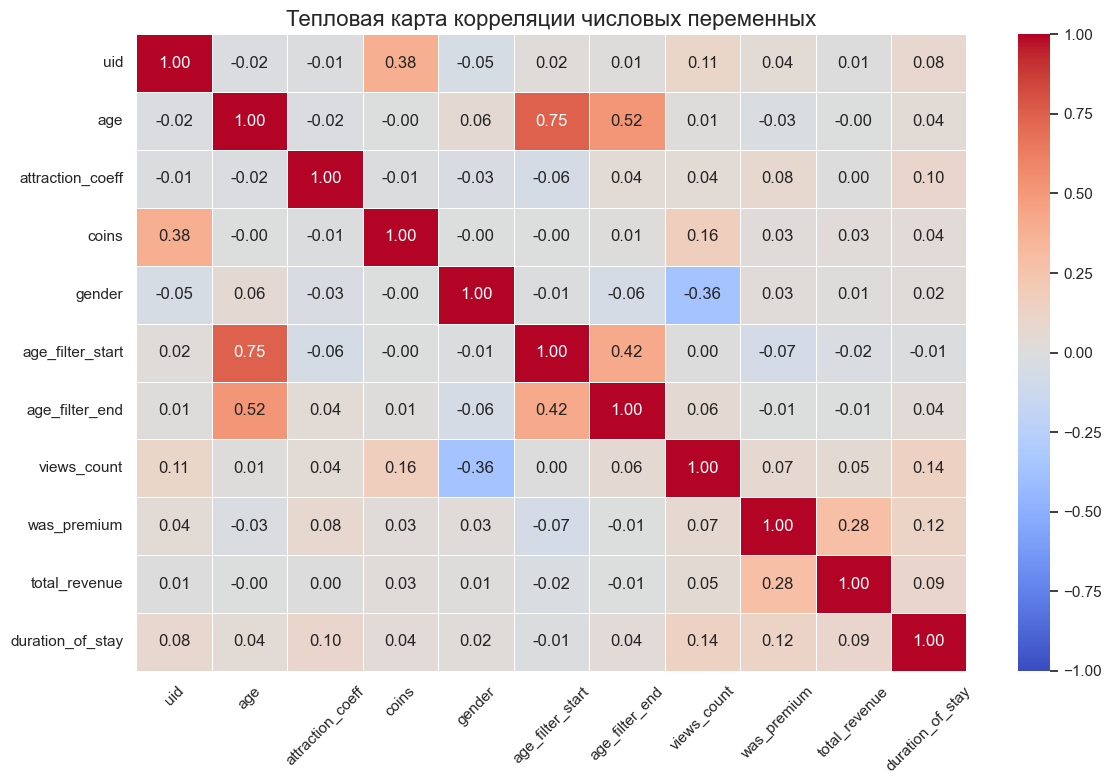

In [742]:
numeric_columns = users.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5
)

plt.title('Тепловая карта корреляции числовых переменных', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Значимая корреляция имеется только с данными возрастных фильтров и возраста самого пользователя.

Хочу посмотреть какой состав пользовательской аудитории в двух контрольных группах. Проверю, существенны ли различия по возрасту, полу и географической принадлежности.

Проведу сегментацию пользователей по возрасту

In [747]:
buckets = [0, 18, 44, 59, 74, 90]
buckets_name = ['teenager', 'young', 'average', 'elderly', 'old']

users['age_group']=pd.cut(users['age'].values, buckets , labels = buckets_name)
users

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,total_revenue,duration_of_stay,group,age_group
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0.0,0,14,test,young
1,892044516,27,0,0.0,Germany,nan,1,24,30,0,0.0,0,1,test,young
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0.0,0,20,test,average
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0.0,0,12,test,young
4,891406035,27,1000,0.0,France,nan,1,24,30,1,1.0,0,1,test,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12882,891937401,63,242,0.0,Italy,"1,2",1,50,66,33,0.0,0,2,control_2,elderly
12883,891692844,35,500,0.0,France,"1,2,3,4,5,6,8,9,10,11,12,14,16",1,24,45,2,0.0,0,13,control_2,young
12884,891096429,41,333,0.0,United States of America,nan,1,38,44,6,0.0,0,1,control_2,young
12885,891697584,48,210,0.0,United Kingdom (Great Britain),"2,3,5,7,9,10,12,14,15",1,45,51,19,0.0,0,9,control_2,average


Проверю, существенно ли различаются контрольные группы по возрасту с помощью ХИ квадрат Пирсона.

Н0 - связи между переменными нет

Н1 - связь между переменными существует

In [750]:
table_age = pd.crosstab(users[users.group != 'test'].age_group, users.group)
table_age

group,control_1,control_2
age_group,,
teenager,178,169
young,3589,3537
average,539,510
elderly,14,27
old,1,3


In [752]:
g, p, dof, expctd = scipy.stats.chi2_contingency(table_age)
print('р уровень значимости равен:', p)

р уровень значимости равен: 0.20825883954453525


p-value получилось больше 0,05, поэтому у нас нет оснований отвергнуть гипотезу. Вывод: возрастной состав аудитории в двух контрольных выборках различается незначительно.

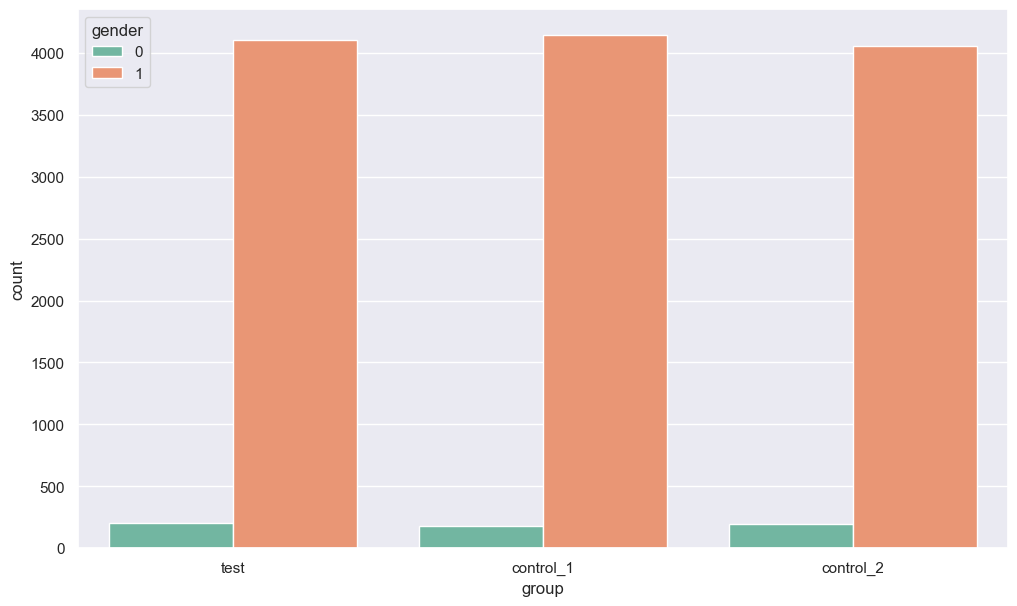

In [755]:
sns.countplot(data=users, x='group',
              palette='Set2',
              hue='gender')
plt.show()

Приложением в большей степенью пользуются мужчины (gender 1), чем женщины (gender 0). 

Визуально можно сказать, что данные в группах распределены равномерно. Во всех группах количество мужчин превышает количество женщин. Но проверю, существенно ли различаются контрольные группы по половому признаку с помощью ХИ квадрат Пирсона.

Н0 - связи между переменными нет

Н1 - связь между переменными существует

In [759]:
table_gen = pd.crosstab(users[users.group != 'test'].gender, users.group)
table_gen

group,control_1,control_2
gender,,
0,182,194
1,4148,4055


In [761]:
g, p, dof, expctd = scipy.stats.chi2_contingency(table_gen)
print('р уровень значимости равен:', p)

р уровень значимости равен: 0.4428431759362572


p-value > 0.05, не отклоняем Н0 о том, что связи между переменными нет. Контрольные группы различаются не существенно по половому признаку.

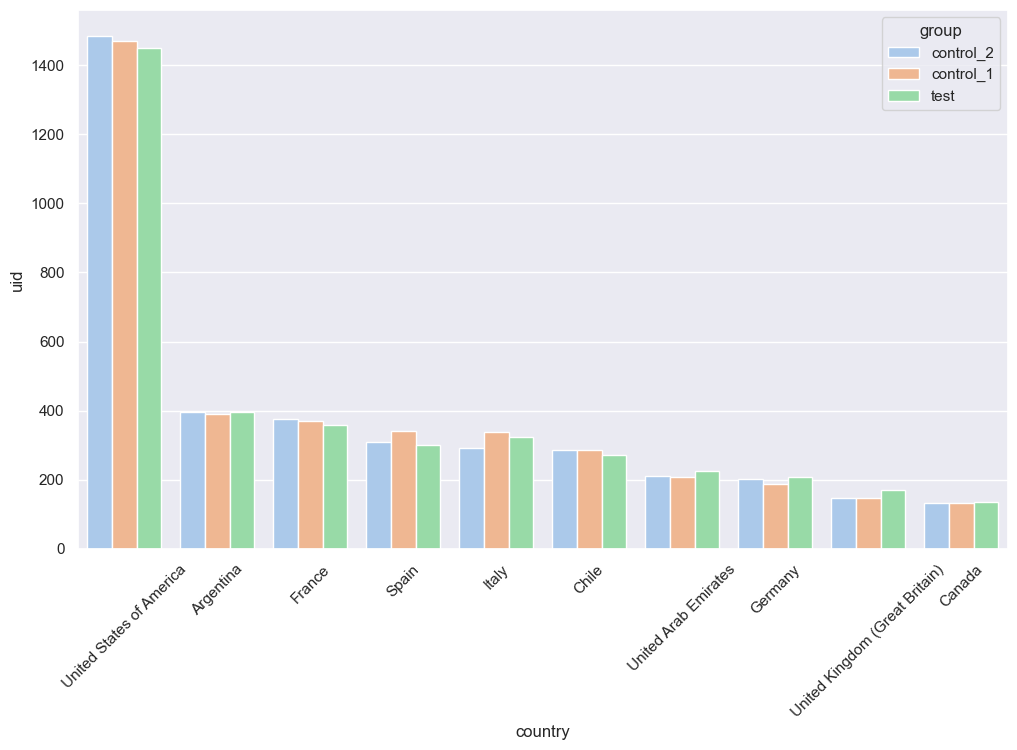

In [764]:
sns.set(rc={'figure.figsize': (12, 7)})
sns.barplot(data=users.groupby(['country', 'group'], as_index=False).agg({'uid': 'count'}).sort_values(by='uid', ascending=False)
                 .head(30), x='country', y='uid', hue='group', palette='pastel')
plt.xticks(rotation=45)
plt.show()

Визуально кажется, что в эксперименте участвовало одинаковое количество пользователей из разных стран.
Проверю, существенно ли различаются контрольные группы по принадлежности к стране. Т.к. у нас две номенативные переменные (принадлежность к группе и принадлежность к стране) я буду испльзовать ХИ квадрат Пирсона

Н0 - связи между переменными нет

Н1 - связь между переменными существует

In [767]:
table_country = pd.crosstab(users[users.group != 'test'].country, users.group)
table_country

group,control_1,control_2
country,,
Algeria,2,0
Argentina,389,397
Australia,50,51
Belgium,108,90
Canada,134,134
Chile,287,286
Colombia,1,2
Costa Rica,1,1
Dominican Republic,2,1


In [769]:
g, p, dof, expctd = scipy.stats.chi2_contingency(table_country)
print('р уровень значимости равен:', p)

р уровень значимости равен: 0.2373805645096396


p-value > 0.05, не отклоняем Н0 о том, что связи между переменными нет. Пользовательская аудитория в двух контрольных группах не существенно отличается по странам.

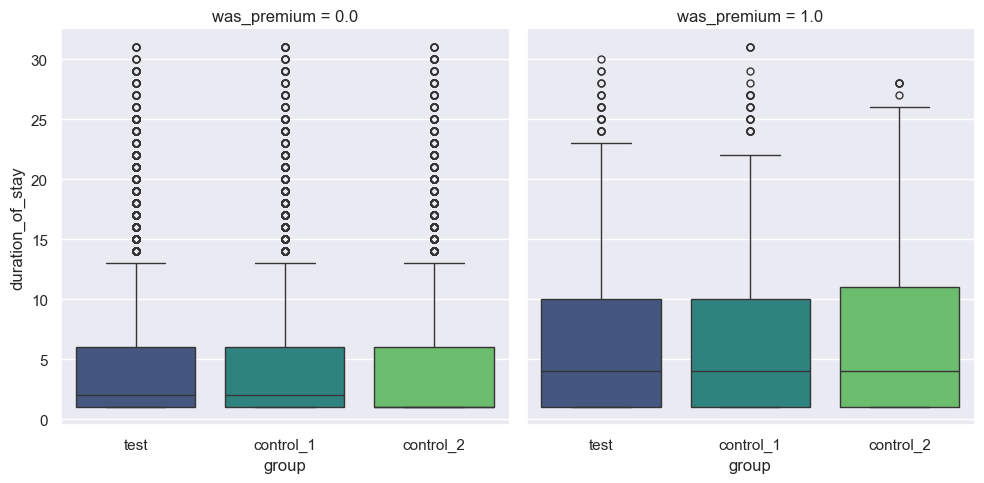

In [772]:
sns.catplot(
    data=users,
    x='group', 
    y='duration_of_stay',
    hue='group',
    palette='viridis',
    kind = 'box',
    col='was_premium')
plt.show()

Таким образом, в ходе предварительного анализа оставила данные только для тех стран, которые были в группе test. В данных was_premium, поскольку были пропущенные значения, пропуски заполнила нулями. Если премиум был - будет 1, если нет - 0.
При наличии premium продолжительность посещения приложения выше. Это логично - при наличии premium пользователь чаще заходит в приложение и использует все возможности этого статуса.
Приложением пользуются в основном мужчины, средний возраст которых за 30 лет.
Большая часть пользователей из USA, Spain, Italy, France.

На основании проведенного анализа, рассматривать в дальнейшем буду только одну контрольную группу control_1, поскольку нет существенных различий по возрасту, полу и географической принадлежности пользователей.

Для оценки эффективности проведенного эксперимента с изменением цены премиум-подписки удобно использовать показатели ARPU, ARPPU.

ARPU = Общий доход / Количество пользователей за период.

ARPPU = Общий доход за период / Количество платящих пользователей за период.

Чем выше ARPU и чем ближе этот показатель к ARPPU, тем больше пользователей готовы платить за продукт.

ARPU – это показатель монетизационной эффективности проекта: чем он выше, тем больше денег приносит один пользователь за период. ARPU можно использовать как основную метрику при выводе новых изменений проекта – если значение увеличивается, то вы всё сделали верно.

ARPPU - в расчёт этого показателя попадают не все пользователи, а только те, что совершали платежи в течение периода.
ARPPU – это реакция именно платящих пользователей на ценность, которую несёт проект. Эта метрика показывает, сколько готов заплатить платящий пользователь. Также ее можно трактовать как реакцию пользователей на цены, установленные в проекте. Если цены поднимутся, то ARPPU, скорее всего, поднимется вслед за ними. Однако это не значит, что компания будет больше зарабатывать, так как доля платящих пользователей может резко упасть.


In [777]:
metrics = pd.DataFrame()
metrics['active_users'] = users.groupby('group').uid.count()
metrics['paying_users'] = users[(users.total_revenue > 0)].groupby('group').uid.count()
metrics['paying_users_was_premium'] = users[(users.total_revenue > 0) & (users.was_premium == 1)].groupby('group').uid.count()
metrics['CR_was_premium'] = round(users[(users.total_revenue > 0) & (users.was_premium == 1)].groupby('group').uid.count() / users.groupby('group').uid.count() *100, 2)
metrics['CR_trial_premium'] = round(users[(users.total_revenue == 0) & (users.was_premium == 1)].groupby('group').uid.count() / users.groupby('group').uid.count() *100, 2)
metrics['average_check'] = round(users.groupby('group').total_revenue.mean(), 2)
metrics['arppu'] = round(users.groupby('group').total_revenue.sum() / users[(users.total_revenue > 0)].groupby('group').uid.count(), 2)
metrics['arpu'] = round(users.groupby('group').total_revenue.sum() / users.groupby('group').uid.count(), 2)
metrics

,active_users,paying_users,paying_users_was_premium,CR_was_premium,CR_trial_premium,average_check,arppu,arpu
group,,,,,,,,
control_1,4330,192,179,4.13,5.94,596.14,13444.10,596.14
control_2,4249,185,173,4.07,5.55,446.11,10245.97,446.11
test,4308,146,140,3.25,6.22,534.08,15759.03,534.08


In [779]:
def check_normality_of_means(data, group_col, value_col, n_iter=500, sample_size=100):

    means = []
    for _ in tqdm(range(n_iter)):
        sample = data.groupby(group_col).sample(sample_size, replace=True)[value_col].mean()
        means.append(sample)
    stat, p_value = shapiro(means)
    return p_value

def compare_groups(data, group_col, value_col, group_1, group_2, n_iter=500, sample_size=100):

    # Фильтрация данных по группам
    data_1 = data[data[group_col] == group_1][value_col]
    data_2 = data[data[group_col] == group_2][value_col]
    
    # Проверка нормальности распределения средних
    p_value_normality = check_normality_of_means(data, group_col, value_col, n_iter, sample_size)
    
    if p_value_normality > 0.05:
        # Если распределение средних нормальное, проверяем равенство дисперсий
        stat_levene, p_value_levene = levene(data_1, data_2)
        equal_var = p_value_levene > 0.05
        
        # Применяем t-тест
        stat, p_value = ttest_ind(data_1, data_2, equal_var=equal_var)
        method = "t-тест"
    else:
        # Если распределение средних ненормальное, используем бутстреп
        def statistic(x, y):
            return np.mean(x) - np.mean(y)
        
        res = bootstrap((data_1, data_2), statistic, n_resamples=n_iter)
        p_value = np.mean(res.bootstrap_distribution > 0) * 2  # Двусторонний тест
        method = "бутстреп"
    
    return {"p_value": p_value, "method": method}

# Пример использования
result = compare_groups(
    data=users,
    group_col='group',
    value_col='total_revenue',
    group_1='control_1',
    group_2='test',
    n_iter=1000,
    sample_size=100
)

print("Результат сравнения групп:")
print(f"Метод: {result['method']}, p-value: {result['p_value']}")

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 667.57it/s]


Результат сравнения групп:
Метод: бутстреп, p-value: 1.29


Буду использовать метод bootstrap сначала для ARPU, а затем для ARPPU.

Н0 - два средних значения ARPU равны в обеих группах
Н1 - средние значения ARPU различаются в группах

Гавным критерием будет, чтобы доверительный интервал не включал в себя 0.

In [781]:
def get_bootstrap(data_column_1, data_column_2, boot_it=1000, statistic=np.mean, bootstrap_conf_level=0.95):

    boot_len = max(len(data_column_1), len(data_column_2))
    boot_data = []

    for _ in tqdm(range(boot_it)):
        samples_1 = data_column_1.sample(boot_len, replace=True).values
        samples_2 = data_column_2.sample(boot_len, replace=True).values
        boot_data.append(statistic(samples_2 - samples_1))

    boot_data = pd.Series(boot_data)
    ci = boot_data.quantile([(1 - bootstrap_conf_level) / 2, 1 - (1 - bootstrap_conf_level) / 2])

    mean_diff = np.mean(boot_data)
    std_diff = np.std(boot_data)
    p_1 = norm.cdf(0, loc=mean_diff, scale=std_diff)
    p_2 = norm.cdf(0, loc=-mean_diff, scale=std_diff)
    p_value = min(p_1, p_2) * 2

    plt.figure(figsize=(10, 6))
    sns.histplot(boot_data, bins=50, kde=True)
    plt.axvline(ci.iloc[0], color='r', linestyle='--', label=f'Lower CI: {ci.iloc[0]:.2f}')
    plt.axvline(ci.iloc[1], color='g', linestyle='--', label=f'Upper CI: {ci.iloc[1]:.2f}')
    plt.xlabel('Разница в статистике')
    plt.ylabel('Частота')
    plt.title('Бутстреп-распределение разницы в статистике')
    plt.legend()
    plt.show()

    return {"boot_data": boot_data, "ci": ci, "p_value": p_value}

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4431.21it/s]


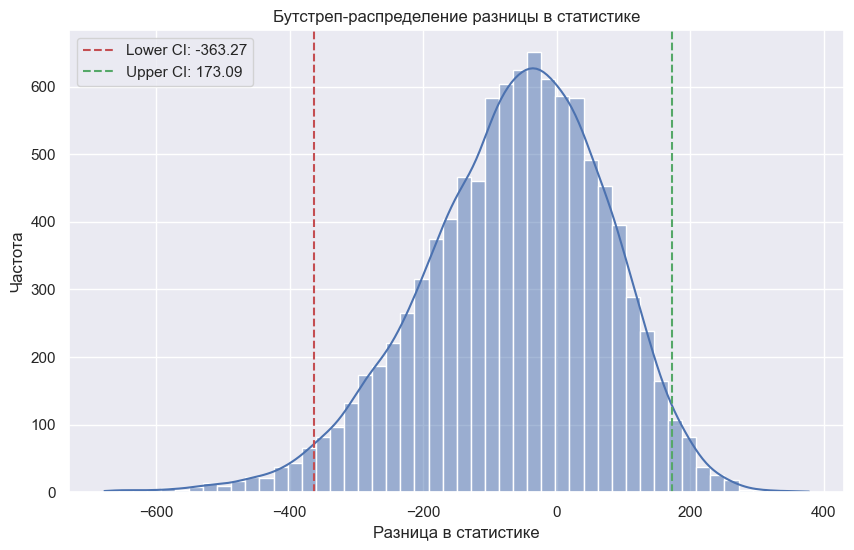

In [782]:
booted_data = get_bootstrap(
    users[users.group == "control_1"].total_revenue,
    users[users.group == "test"].total_revenue,
    boot_it=10000,
    statistic=np.mean,
    bootstrap_conf_level=0.95
)

In [786]:
booted_data['p_value']

0.6412458062308372

In [788]:
booted_data['ci']

0.025   -363.267737
0.975    173.087569
dtype: float64

0 попадает в доверительный интервал. Не отвергаем нулевую гипотезу. ARPU в двух группах не различаются.

Н0 - два средних значения ARPPU равны в обеих группах
Н1 - средние значения ARPPU различаются в группах

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 10635.92it/s]


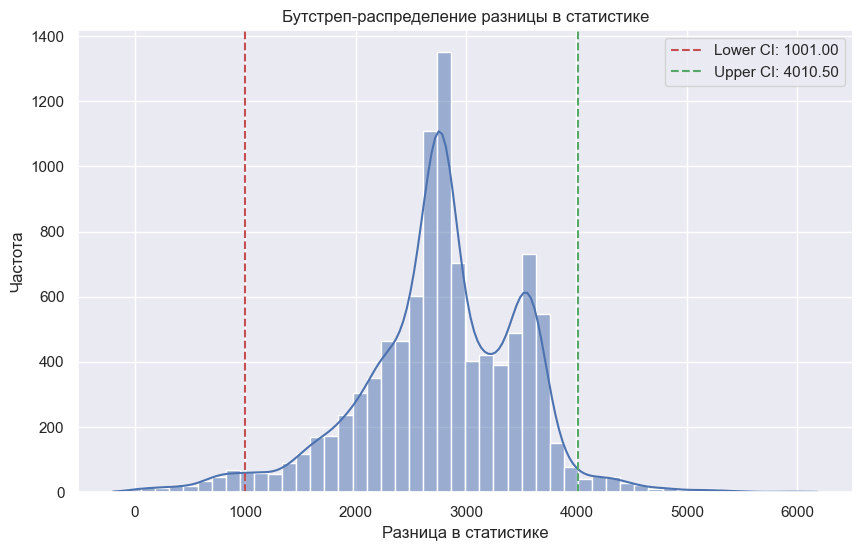

In [296]:
booted_data_pay = get_bootstrap(
    users[(users.total_revenue > 0) & (users.group == 'control_1')].total_revenue,
    users[(users.total_revenue > 0) & (users.group == 'test')].total_revenue,
    boot_it=10000,
    statistic=np.median,
    bootstrap_conf_level=0.95)

In [791]:
booted_data_pay['p_value']

0.00014734305147325903

In [793]:
booted_data_pay['ci']

0.025    1001.0
0.975    4010.5
dtype: float64

Доверительный интервал не включает в себя 0. Отвергаем нулевую гипотезу. ARPPU в двух группах различаются.

Рассчитаю конверсию в платящего пользователя премиум-подписки для контрольной и тестовой групп с помощью z-тест.
Рассчитаю значение p-value и z-статистику.

In [797]:
control_group = users.loc[(users['group'] == 'control_1')]
control_premium = control_group[(control_group.total_revenue > 0) & (control_group.was_premium == 1)]['was_premium']
num_control = len(control_group['was_premium'])

test_group = users.loc[(users['group'] == 'test')]
test_premium = test_group[(test_group.total_revenue > 0) & (test_group.was_premium == 1)]['was_premium']
num_test = len(test_group['was_premium'])

z_stat, p_value = proportions_ztest([control_premium.sum(), test_premium.sum()], [num_control, num_test], alternative='two-sided')
print('{0:0.3f}'.format(p_value))

0.029


Как видно, p_value равно 0,029, что меньше 0,05. Таким образом, мы отвергаем нулевую гипотезу о том, что нет статистически значимого различия. После увеличения цены на премиум-подписку доля людей, приобретающих платную премиум-подписку, статистически значимо снизилась.

In [800]:
control_group = users.loc[(users['group'] == 'control_1')]
control_trial = control_group[(control_group.total_revenue == 0) & (control_group.was_premium == 1)]['was_premium']
num_control_trial = control_group['was_premium'].shape[0]

test_group = users.loc[(users['group'] == 'test')]
test_trial = test_group[(test_group.total_revenue == 0) & (test_group.was_premium == 1)]['was_premium']
num_test_trial = test_group['was_premium'].shape[0]

z_stat, p_value = proportions_ztest([control_trial.sum(), test_trial.sum()], [num_control_trial, num_test_trial], alternative='two-sided')
print('{0:0.3f}'.format(p_value))

0.578


А вот доля пользователей приложения, которые пользовались пробной премиум-подпиской, статистически значимо не изменилась.

## 2: графики, гипотезы и тесты для данных transactions

In [804]:
transactions_test = pd.read_csv('Проект_3_transactions_test.csv', encoding='Windows-1251', sep=';')
transactions_control_1 = pd.read_csv('Проект_3_transactions_control_1.csv', encoding='Windows-1251', sep=';')
transactions_control_2 = pd.read_csv('Проект_3_transactions_control_2.csv', encoding='Windows-1251', sep=';')

In [806]:
transactions_test.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium


In [808]:
transactions_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           273 non-null    int64 
 1   country       273 non-null    object
 2   joined_at     273 non-null    object
 3   paid_at       273 non-null    object
 4   revenue       273 non-null    int64 
 5   payment_id    273 non-null    int64 
 6   from_page     273 non-null    object
 7   product_type  273 non-null    object
dtypes: int64(3), object(5)
memory usage: 17.2+ KB


In [810]:
transactions_test.joined_at = pd.to_datetime(transactions_test.joined_at)
transactions_test.paid_at = pd.to_datetime(transactions_test.paid_at)

In [812]:
transactions_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           273 non-null    int64         
 1   country       273 non-null    object        
 2   joined_at     273 non-null    datetime64[ns]
 3   paid_at       273 non-null    datetime64[ns]
 4   revenue       273 non-null    int64         
 5   payment_id    273 non-null    int64         
 6   from_page     273 non-null    object        
 7   product_type  273 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 17.2+ KB


In [814]:
transactions_test.describe(include='all')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
count,2.730000e+02,273,273,273,273.000000,273.000000,273,273
unique,NaN,17,NaN,NaN,NaN,NaN,22,4
top,NaN,United States of America,NaN,NaN,NaN,NaN,empty_likes,coins
freq,NaN,94,NaN,NaN,NaN,NaN,72,106
mean,8.918375e+08,NaN,2017-09-05 09:39:38.021978112,2017-09-05 17:54:49.230769152,8589.380952,98.227106,NaN,NaN
min,8.910712e+08,NaN,2017-01-11 03:07:00,2017-01-11 04:37:00,533.000000,0.000000,NaN,NaN
25%,8.915082e+08,NaN,2017-08-11 03:54:00,2017-07-11 21:21:00,2743.000000,19.000000,NaN,NaN
50%,8.919143e+08,NaN,2017-10-18 19:20:00,2017-10-22 16:23:00,6305.000000,146.000000,NaN,NaN
75%,8.921442e+08,NaN,2017-10-23 08:21:00,2017-10-29 05:50:00,12597.000000,147.000000,NaN,NaN
max,8.924386e+08,NaN,2017-10-31 23:40:00,2017-12-11 22:06:00,113477.000000,147.000000,NaN,NaN


Есть пользователи, которые заплатили раньше, чем присоединились. Оставлю только те записи, для которых дата присоединения раньше даты оплаты

In [817]:
transactions_test = transactions_test[(transactions_test['joined_at'] <= transactions_test['paid_at'])]

In [819]:
transactions_test.describe(include='all')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
count,2.260000e+02,226,226,226,226.000000,226.000000,226,226
unique,NaN,16,NaN,NaN,NaN,NaN,20,4
top,NaN,United States of America,NaN,NaN,NaN,NaN,empty_likes,coins
freq,NaN,82,NaN,NaN,NaN,NaN,64,88
mean,8.918307e+08,NaN,2017-08-25 21:43:36.902654976,2017-09-29 20:03:30.265486848,8598.004425,98.778761,NaN,NaN
min,8.910712e+08,NaN,2017-01-11 03:07:00,2017-02-11 13:43:00,533.000000,0.000000,NaN,NaN
25%,8.914161e+08,NaN,2017-06-11 22:53:15,2017-10-15 21:11:45,2733.250000,19.000000,NaN,NaN
50%,8.919863e+08,NaN,2017-10-18 01:09:00,2017-10-23 13:57:00,6305.000000,146.000000,NaN,NaN
75%,8.921986e+08,NaN,2017-10-22 03:02:00,2017-10-30 02:04:45,12597.000000,147.000000,NaN,NaN
max,8.924386e+08,NaN,2017-10-31 23:40:00,2017-12-11 22:06:00,113477.000000,147.000000,NaN,NaN


In [821]:
transactions_test.query('revenue > 0').agg({'uid':'count'})

uid    226
dtype: int64

In [823]:
transactions_test.nunique()

uid             128
country          16
joined_at       128
paid_at         212
revenue         110
payment_id        6
from_page        20
product_type      4
dtype: int64

In [825]:
transactions_test.shape

(226, 8)

In [827]:
transactions_test.isna().sum()

uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
dtype: int64

Пропущенных значений нет

Число записей больше числа уникальных пользователей в датасете транзакций. Дубли убираю

In [830]:
transactions_test = transactions_test.drop_duplicates(subset=['uid', 'paid_at'])

In [832]:
transactions_test

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium
...,...,...,...,...,...,...,...,...
268,891419625,Israel,2017-04-11 05:58:00,2017-11-11 08:33:00,14352,147,trial_vip_popup,trial_premium
269,891447105,United Kingdom (Great Britain),2017-03-11 17:05:00,2017-11-11 04:23:00,7319,147,fans,premium_no_trial
270,891497073,United States of America,2017-02-11 15:33:00,2017-05-11 04:06:00,2730,67,empty_likes,other_type
271,891406224,Israel,2017-04-11 12:56:00,2017-04-11 13:35:00,2743,67,empty_likes,other_type


In [834]:
transactions_test['group'] = 'test'

In [836]:
transactions_control_1.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins


In [838]:
transactions_control_1.shape

(1007, 8)

In [840]:
transactions_control_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uid           377 non-null    float64
 1   country       377 non-null    object 
 2   joined_at     1007 non-null   object 
 3   paid_at       1007 non-null   object 
 4   revenue       377 non-null    float64
 5   payment_id    377 non-null    float64
 6   from_page     377 non-null    object 
 7   product_type  377 non-null    object 
dtypes: float64(3), object(5)
memory usage: 63.1+ KB


In [842]:
transactions_control_1.joined_at = pd.to_datetime(transactions_control_1.joined_at)
transactions_control_1.paid_at = pd.to_datetime(transactions_control_1.paid_at)

In [844]:
transactions_control_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           377 non-null    float64       
 1   country       377 non-null    object        
 2   joined_at     377 non-null    datetime64[ns]
 3   paid_at       377 non-null    datetime64[ns]
 4   revenue       377 non-null    float64       
 5   payment_id    377 non-null    float64       
 6   from_page     377 non-null    object        
 7   product_type  377 non-null    object        
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 63.1+ KB


In [846]:
transactions_control_1.isna().sum()

uid             630
country         630
joined_at       630
paid_at         630
revenue         630
payment_id      630
from_page       630
product_type    630
dtype: int64

Пропущенных значений в группе control_1 - больше половины пропущенных значений всех наблюдений (630). Применю dropna(), чтобы удалить пропущенные значения

In [849]:
transactions_control_1 = transactions_control_1.dropna()

In [851]:
transactions_control_1.describe(include='all')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
count,3.770000e+02,377,377,377,377.000000,377.000000,377,377
unique,NaN,18,NaN,NaN,NaN,NaN,25,4
top,NaN,United States of America,NaN,NaN,NaN,NaN,empty_likes,coins
freq,NaN,105,NaN,NaN,NaN,NaN,99,149
mean,8.923612e+08,NaN,2017-08-22 02:04:00.636604672,2017-09-05 07:39:33.262599680,6929.206897,91.145889,NaN,NaN
min,8.910923e+08,NaN,2015-01-19 11:49:00,2016-12-14 16:16:00,26.000000,0.000000,NaN,NaN
25%,8.913833e+08,NaN,2017-06-11 17:23:00,2017-07-11 12:47:00,2730.000000,19.000000,NaN,NaN
50%,8.918225e+08,NaN,2017-10-16 22:33:00,2017-10-17 00:40:00,6266.000000,127.000000,NaN,NaN
75%,8.921850e+08,NaN,2017-10-22 22:07:00,2017-10-28 03:14:00,6448.000000,147.000000,NaN,NaN
max,9.609370e+08,NaN,2017-10-31 22:17:00,2017-12-11 21:57:00,63037.000000,147.000000,NaN,NaN


In [853]:
transactions_control_1 = transactions_control_1[(transactions_control_1['joined_at'] <= transactions_control_1['paid_at'])]

In [855]:
transactions_control_1.describe(include='all')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
count,3.220000e+02,322,322,322,322.000000,322.000000,322,322
unique,NaN,18,NaN,NaN,NaN,NaN,25,4
top,NaN,United States of America,NaN,NaN,NaN,NaN,empty_likes,coins
freq,NaN,94,NaN,NaN,NaN,NaN,84,125
mean,8.924428e+08,NaN,2017-08-11 01:32:42.484471808,2017-09-23 05:59:53.478260736,7116.409938,90.807453,NaN,NaN
min,8.910923e+08,NaN,2015-01-19 11:49:00,2016-12-14 16:16:00,26.000000,0.000000,NaN,NaN
25%,8.913668e+08,NaN,2017-06-11 01:54:30,2017-10-11 01:52:00,2730.000000,19.000000,NaN,NaN
50%,8.918225e+08,NaN,2017-10-16 01:38:00,2017-10-21 03:39:00,5895.500000,127.000000,NaN,NaN
75%,8.922007e+08,NaN,2017-10-21 16:48:30,2017-10-29 15:46:30,6444.750000,147.000000,NaN,NaN
max,9.609370e+08,NaN,2017-10-31 03:34:00,2017-12-11 21:57:00,63037.000000,147.000000,NaN,NaN


In [857]:
transactions_control_1[transactions_control_1['joined_at'].dt.year == 2015]

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
65,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26.0,0.0,refund_VP,other_type
101,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:35:00,637.0,0.0,refung_AP,other_type
224,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143.0,0.0,refund_WP,other_type


В группе control_1 есть данные, выходящие за временной отрезок эксперимента (данных группы test). Есть 3 транзакции, которые были в 2015 году, когда эксперимент точно проходил в 2017, их убираю

In [860]:
transactions_control_1 = transactions_control_1[transactions_control_1['joined_at'].dt.year == 2017]

In [862]:
transactions_control_1.describe(include='all')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
count,3.190000e+02,319,319,319,319.000000,319.000000,319,319
unique,NaN,17,NaN,NaN,NaN,NaN,22,4
top,NaN,United States of America,NaN,NaN,NaN,NaN,empty_likes,coins
freq,NaN,94,NaN,NaN,NaN,NaN,84,125
mean,8.917986e+08,NaN,2017-08-19 20:28:58.871473408,2017-09-25 21:46:05.642633472,7180.808777,91.661442,NaN,NaN
min,8.910923e+08,NaN,2017-01-11 01:06:00,2017-01-11 05:16:00,481.000000,0.000000,NaN,NaN
25%,8.913661e+08,NaN,2017-06-11 02:02:00,2017-10-11 05:23:30,2821.000000,19.000000,NaN,NaN
50%,8.918194e+08,NaN,2017-10-16 01:38:00,2017-10-21 13:09:00,6292.000000,127.000000,NaN,NaN
75%,8.921884e+08,NaN,2017-10-21 17:52:00,2017-10-29 17:30:30,6448.000000,147.000000,NaN,NaN
max,8.924233e+08,NaN,2017-10-31 03:34:00,2017-12-11 21:57:00,63037.000000,147.000000,NaN,NaN


In [864]:
transactions_control_1.query('revenue > 0').agg({'uid':'count'})

uid    319
dtype: int64

In [866]:
transactions_control_1.nunique()

uid             168
country          17
joined_at       168
paid_at         279
revenue         110
payment_id        7
from_page        22
product_type      4
dtype: int64

In [868]:
transactions_control_1.shape

(319, 8)

In [870]:
transactions_control_1.isna().sum()

uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
dtype: int64

Число записей больше числа уникальных пользователей в датасете транзакций. Дубли убираю

In [873]:
transactions_control_1 = transactions_control_1.drop_duplicates(subset=['uid', 'paid_at'])

Оставлю данные только для тех стран, которые были в группе test

In [876]:
transactions_control_1 = transactions_control_1[transactions_control_1['country'].isin(transactions_test['country'])]

In [878]:
transactions_control_1

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins
...,...,...,...,...,...,...,...,...
371,892074894.0,Canada,2017-10-21 17:12:00,2017-10-25 17:20:00,6292.0,147.0,promo_09,premium_no_trial
372,891556971.0,France,2017-01-11 05:07:00,2017-01-11 05:16:00,2886.0,68.0,none,premium_no_trial
373,892052106.0,Spain,2017-10-22 01:38:00,2017-10-29 03:44:00,12883.0,147.0,trial_vip_popup,trial_premium
375,891458229.0,Spain,2017-03-11 12:12:00,2017-04-11 03:43:00,6305.0,19.0,menu,coins


In [880]:
transactions_control_1.shape

(271, 8)

In [882]:
transactions_control_1['group'] = 'control_1'

In [884]:
transactions_control_2.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891266616,Argentina,2017-06-11 15:25:00,2017-10-11 17:35:00,6305,19,autorefill,coins
1,892186737,Chile,2017-10-19 06:03:00,2017-04-11 08:53:00,4732,147,promo_09,premium_no_trial
2,891959004,United States of America,2017-10-24 00:12:00,2017-10-31 02:12:00,10153,147,trial_vip_popup,trial_premium
3,892115478,Spain,2017-10-20 20:39:00,2017-10-26 06:26:00,2366,67,empty_likes,other_type
4,891592941,Switzerland,2017-10-31 12:40:00,2017-03-11 16:25:00,6292,147,promo_09,premium_no_trial


In [886]:
transactions_control_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           328 non-null    int64 
 1   country       328 non-null    object
 2   joined_at     328 non-null    object
 3   paid_at       328 non-null    object
 4   revenue       328 non-null    int64 
 5   payment_id    328 non-null    int64 
 6   from_page     328 non-null    object
 7   product_type  328 non-null    object
dtypes: int64(3), object(5)
memory usage: 20.6+ KB


In [888]:
transactions_control_2.joined_at = pd.to_datetime(transactions_control_2.joined_at)
transactions_control_2.paid_at = pd.to_datetime(transactions_control_2.paid_at)

In [890]:
transactions_control_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           328 non-null    int64         
 1   country       328 non-null    object        
 2   joined_at     328 non-null    datetime64[ns]
 3   paid_at       328 non-null    datetime64[ns]
 4   revenue       328 non-null    int64         
 5   payment_id    328 non-null    int64         
 6   from_page     328 non-null    object        
 7   product_type  328 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 20.6+ KB


In [892]:
transactions_control_2['joined_at'].describe(include='all')

count                           328
mean     2017-09-19 07:38:22.500000
min             2017-01-11 08:36:00
25%             2017-10-13 09:36:45
50%             2017-10-20 14:49:00
75%             2017-10-26 01:40:00
max             2017-10-31 17:43:00
Name: joined_at, dtype: object

In [894]:
transactions_control_2 = transactions_control_2[(transactions_control_2['joined_at'] <= transactions_control_2['paid_at'])]

In [896]:
transactions_control_2.describe(include='all')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
count,2.680000e+02,268,268,268,268.000000,268.000000,268,268
unique,NaN,17,NaN,NaN,NaN,NaN,17,4
top,NaN,United States of America,NaN,NaN,NaN,NaN,empty_likes,coins
freq,NaN,87,NaN,NaN,NaN,NaN,86,103
mean,8.918194e+08,NaN,2017-09-10 17:12:44.999999744,2017-10-03 13:21:55.970149120,5572.149254,94.347015,NaN,NaN
min,8.910681e+08,NaN,2017-01-11 08:36:00,2017-02-11 21:52:00,481.000000,0.000000,NaN,NaN
25%,8.914369e+08,NaN,2017-09-11 15:20:15,2017-10-16 06:51:45,2015.000000,19.000000,NaN,NaN
50%,8.919493e+08,NaN,2017-10-18 17:33:30,2017-10-23 20:17:00,4537.000000,146.000000,NaN,NaN
75%,8.921415e+08,NaN,2017-10-23 02:25:00,2017-10-29 20:35:30,6305.000000,147.000000,NaN,NaN
max,8.924388e+08,NaN,2017-10-30 19:29:00,2017-12-11 23:28:00,81796.000000,147.000000,NaN,NaN


In [898]:
transactions_control_2.query('revenue > 0').agg({'uid':'count'})

uid    268
dtype: int64

Все пользователи приложения являются платящими

In [901]:
transactions_control_2.nunique()

uid             154
country          17
joined_at       154
paid_at         253
revenue         105
payment_id        6
from_page        17
product_type      4
dtype: int64

In [903]:
transactions_control_2.shape

(268, 8)

In [905]:
transactions_control_2.isna().sum()

uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
dtype: int64

Пропущенных значений нет

Число записей больше числа уникальных пользователей в датасете транзакций. Дубли убираю

In [908]:
transactions_control_2 = transactions_control_2.drop_duplicates(subset=['uid', 'paid_at'])

Оставлю данные только для тех стран, которые были в группе test

In [911]:
transactions_control_2 = transactions_control_2[transactions_control_2['country'].isin(transactions_test['country'])]

In [913]:
transactions_control_2

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891266616,Argentina,2017-06-11 15:25:00,2017-10-11 17:35:00,6305,19,autorefill,coins
2,891959004,United States of America,2017-10-24 00:12:00,2017-10-31 02:12:00,10153,147,trial_vip_popup,trial_premium
3,892115478,Spain,2017-10-20 20:39:00,2017-10-26 06:26:00,2366,67,empty_likes,other_type
5,892245918,France,2017-10-17 21:05:00,2017-10-17 22:35:00,6292,147,autoreply_message,premium_no_trial
6,891862596,Italy,2017-10-26 01:40:00,2017-10-30 09:01:00,1261,19,empty_likes,coins
...,...,...,...,...,...,...,...,...
323,891985866,Belgium,2017-10-23 13:19:00,2017-10-30 15:35:00,16640,147,trial_vip_popup,trial_premium
324,891491145,United States of America,2017-02-11 18:13:00,2017-09-11 20:32:00,12727,147,send_message,trial_premium
325,892053750,United States of America,2017-10-22 00:46:00,2017-10-28 08:17:00,1261,19,autorefill,coins
326,891668253,Chile,2017-10-29 23:08:00,2017-11-15 00:57:00,9997,147,trial_vip_popup,trial_premium


In [915]:
transactions_control_2['group'] = 'control_2'

In [917]:
transactions = pd.concat([transactions_test, transactions_control_1, transactions_control_2], ignore_index= True)
transactions

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
0,891345942.0,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909.0,147.0,trial_vip_popup,trial_premium,test
1,892054251.0,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium,test
2,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783.0,67.0,menu,other_type,test
3,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783.0,67.0,menu,other_type,test
4,892168170.0,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087.0,147.0,trial_vip_popup,trial_premium,test
...,...,...,...,...,...,...,...,...,...
717,891985866.0,Belgium,2017-10-23 13:19:00,2017-10-30 15:35:00,16640.0,147.0,trial_vip_popup,trial_premium,control_2
718,891491145.0,United States of America,2017-02-11 18:13:00,2017-09-11 20:32:00,12727.0,147.0,send_message,trial_premium,control_2
719,892053750.0,United States of America,2017-10-22 00:46:00,2017-10-28 08:17:00,1261.0,19.0,autorefill,coins,control_2
720,891668253.0,Chile,2017-10-29 23:08:00,2017-11-15 00:57:00,9997.0,147.0,trial_vip_popup,trial_premium,control_2


Таким образом, в данных убрала пропущенные значения, убрала дубли.
Оставила данные только для тех стран, в которых проводился эксперимент.
Проверила даты присоединения и оплаты. Во всех группах убрала пользователей, которые заплатили раньше, чем присоединились.
Оставила данные, не выходящие за временной отрезок эксперимента.

In [920]:
transactions.nunique()

uid             436
country          16
joined_at       435
paid_at         715
revenue         224
payment_id        7
from_page        23
product_type      4
group             3
dtype: int64

In [922]:
transactions.groupby(['uid', 'group']).size()

uid          group    
891068079.0  control_2    2
891071157.0  test         1
891075072.0  control_2    1
891077727.0  control_2    1
891080040.0  control_2    8
                         ..
892431081.0  test         1
892434141.0  test         2
892435536.0  control_2    4
892438635.0  test         1
892438776.0  control_2    1
Length: 436, dtype: int64

Retention (повторные платежи)

In [925]:
repeat_purchases = premium_users.groupby(['group', 'uid']).filter(lambda x: len(x) > 1)
retention = repeat_purchases.groupby('group')['uid'].nunique() / premium_users.groupby('group')['uid'].nunique()
retention

group
control_1    0.029630
control_2    0.017094
test         0.028302
Name: uid, dtype: float64

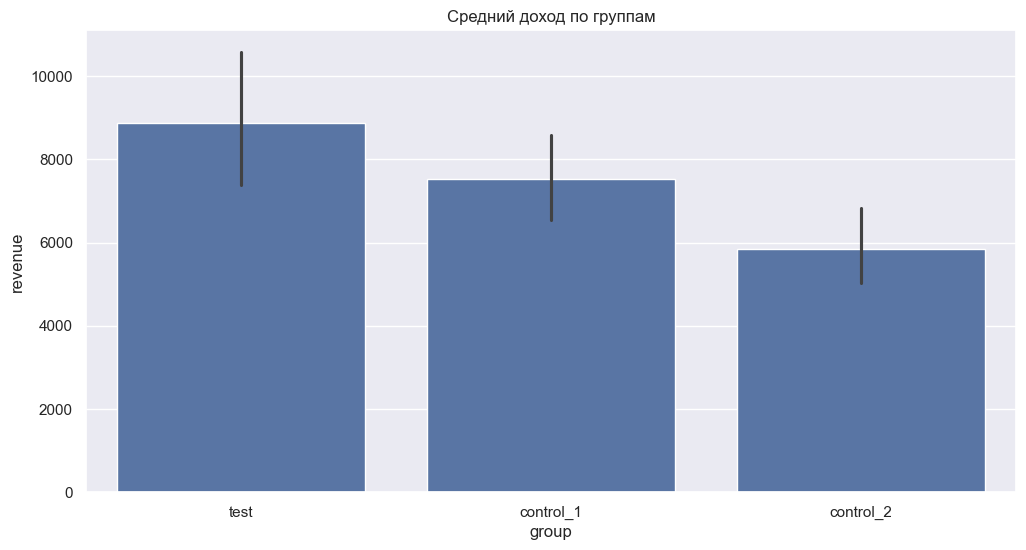

In [927]:
plt.figure(figsize=(12, 6))
sns.barplot(x='group', y='revenue', data=transactions, estimator=np.mean)
plt.title('Средний доход по группам')
plt.show()

Средний доход на пользователя (ARPU)

In [930]:
arpu = transactions.groupby('group')['revenue'].sum() / transactions.groupby('group')['uid'].nunique()
arpu

group
control_1    12585.203704
control_2     9565.952055
test         14686.343750
dtype: float64

In [932]:
result = compare_groups(
    data=transactions,
    group_col='group',
    value_col='revenue',
    group_1='control_1',
    group_2='test',
    n_iter=1000,
    sample_size=100
)

print("Результат сравнения групп:")
print(f"Метод: {result['method']}, p-value: {result['p_value']}")

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1626.33it/s]

Результат сравнения групп:
Метод: бутстреп, p-value: 0.138


Н0 - два средних значения ARPU равны в обеих группах
Н1 - средние значения ARPU различаются в группах

Главным критерием будет, чтобы доверительный интервал не включал в себя 0.

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 11710.43it/s]


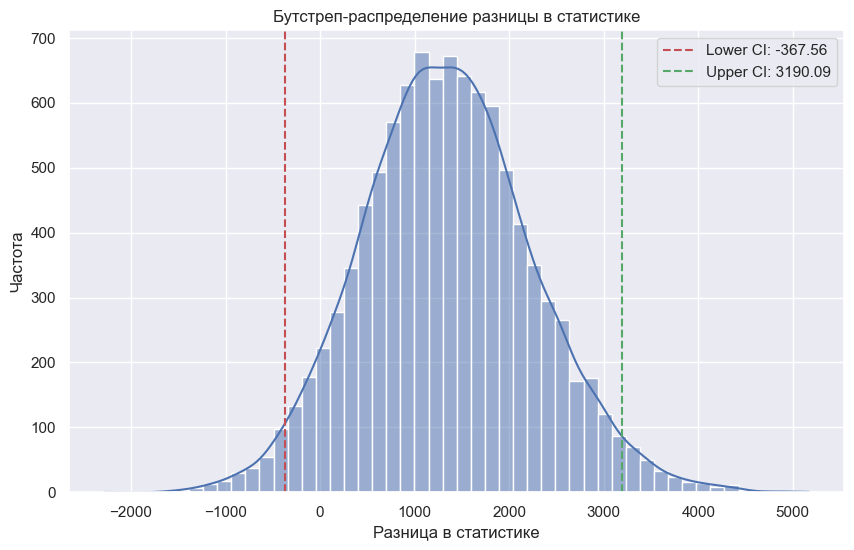

In [942]:
booted_data_tr = get_bootstrap(
    transactions[transactions.group == "control_1"].revenue,
    transactions[transactions.group == "test"].revenue,
    boot_it=10000,
    statistic=np.mean,
    bootstrap_conf_level=0.95
)

In [944]:
booted_data_tr['p_value']

0.1351179845541371

In [946]:
booted_data_tr['ci']

0.025    -367.558210
0.975    3190.089668
dtype: float64

0 попадает в доверительный интервал. Не отвергаем нулевую гипотезу. ARPU в двух группах не различаются.

In [948]:
metrics['CR_premium_no_trial'] = round(transactions[(transactions.product_type == "premium_no_trial")].groupby('group').uid.count() / transactions.groupby('group').uid.count() *100, 2) #конверсия
metrics

,active_users,paying_users,paying_users_was_premium,CR_was_premium,CR_trial_premium,average_check,arppu,arpu,CR_premium_no_trial
group,,,,,,,,,
control_1,4330,192,179,4.13,5.94,596.14,13444.10,596.14,32.84
control_2,4249,185,173,4.07,5.55,446.11,10245.97,446.11,36.82
test,4308,146,140,3.25,6.22,534.08,15759.03,534.08,30.19


Конверсия в покупку премиум-подписки

In [951]:
premium_users = transactions[transactions['product_type'].isin(['trial_premium', 'premium_no_trial'])]
conversion = premium_users.groupby('group')['uid'].nunique() / transactions.groupby('group')['uid'].nunique()
conversion

group
control_1    0.833333
control_2    0.801370
test         0.828125
Name: uid, dtype: float64

In [953]:
control_tr = transactions.loc[(transactions['group'] == 'control_1')]
control_trial_tr = control_tr[(control_tr.product_type == "premium_no_trial")]['uid']
num_control_trial_tr = len(control_tr['uid'])

test_tr = transactions.loc[(transactions['group'] == 'test')]
test_trial_tr = test_tr[(test_tr.product_type == "premium_no_trial")]['uid']
num_test_trial_tr = len(test_tr['uid'])

z_stat, p_value = proportions_ztest([control_trial_tr.count(), test_trial_tr.count()], [num_control_trial_tr, num_test_trial_tr])
print('{0:0.3f}'.format(p_value))

0.534


Как показал рассчет, доля пользователей приложения, которые использовали премиум-подписку без пробной, статистически значимо не отличается в контрольной и тестовой группах.

**Вывод:**
1. Медианная нормированная выручка, приходящаяся на одного платящего пользователя, статистически значимо выросла;
2. Средняя нормированная выручка статистически значимо не изменилась (как в целом за период проведения эксперимента, так и помесячно);
3. Конверсия платящих пользователей премиум-подписки статистически значимо сократилась;
4. Конверсия платящих пользователей премиум-подписки без пробной статистически значимо не изменилась.


* Показатель ARPPU статистически значимо вырос, а ARPU статистически значимо не изменился. ARPPU показывает реакцию пользователей на цены, установленные в проекте. Поскольку цены на премиум-подписку изменилась, то ARPPU вырос. Однако это не значит, что компания стала больше зарабатывать, так как доля платящих пользователей статистически значимо упала. Таким образом, можно заключить, что изменение стоимости премиум-подписки оказало обратный эффект, чем ожидалось. Полагаю, что эксперимент в целом оказался неуспешным. Проводить этот эксперимент в других странах считаю не целесообразным.